In [854]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [855]:
from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
print(sns.__version__)
assert sns.__version__ >= "0.10"
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

0.11.2


C:\Users\Anderson\AppData\Local\Temp\ipykernel_14572\2560186971.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [856]:
train_set = pd.read_csv('data/train_set.csv',index_col=0) 
test_set = pd.read_csv('data/test_set.csv',index_col=0) 

# The problem
The machine learning is to predict the house price, but before that it is imporntat to study the dataset and its features



In [857]:
# print the dataset size
print("There is", train_set.shape[0], "samples")
print("Each sample has", train_set.shape[1], "features")

There is 5432 samples
Each sample has 21 features


In [858]:
# print the top elements from the dataset
train_set.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [859]:
test_set.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,
0,Brighton,1a Mair St,3,h,S,Buxton,6/08/2016,11.2,3186.0,3.0,2.0,3.0,588.0,NaN,NaN,Bayside,-37.9287,144.9920,Southern Metropolitan,10579.0
1,West Melbourne,5/467 King St,2,u,S,Jellis,28/05/2016,1.9,3003.0,2.0,1.0,1.0,0.0,83.0,2002.0,Melbourne,-37.8091,144.9520,Northern Metropolitan,2230.0
2,St Kilda,7/29 Marine Pde,3,u,SP,McGrath,22/04/2017,6.1,3182.0,3.0,1.0,0.0,0.0,115.0,1930.0,Port Phillip,-37.8718,144.9767,Southern Metropolitan,13240.0
3,Pascoe Vale,8/16 Pascoe St,3,t,VB,Trimson,18/06/2016,9.9,3044.0,3.0,2.0,1.0,146.0,106.0,2006.0,Moreland,-37.7152,144.9346,Northern Metropolitan,7485.0
4,South Kingsville,2/77 Vernon St,2,h,SP,Gunn&Co,24/09/2016,9.1,3015.0,2.0,1.0,2.0,462.0,NaN,1970.0,Hobsons Bay,-37.8331,144.8715,Western Metropolitan,984.0


In [860]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5432 entries, 0 to 5431
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         5432 non-null   object 
 1   Address        5432 non-null   object 
 2   Rooms          5432 non-null   int64  
 3   Type           5432 non-null   object 
 4   Price          5432 non-null   float64
 5   Method         5432 non-null   object 
 6   SellerG        5432 non-null   object 
 7   Date           5432 non-null   object 
 8   Distance       5432 non-null   float64
 9   Postcode       5432 non-null   float64
 10  Bedroom2       5432 non-null   float64
 11  Bathroom       5432 non-null   float64
 12  Car            5407 non-null   float64
 13  Landsize       5432 non-null   float64
 14  BuildingArea   2890 non-null   float64
 15  YearBuilt      3302 non-null   float64
 16  CouncilArea    4879 non-null   object 
 17  Lattitude      5432 non-null   float64
 18  Longtitu

In [861]:
train_set_wprice=train_set.loc[:, train_set.columns!='Price']
print('{:15} {:>5} {:>5}'.format("Columns","Train","Test"))
for c in test_set.columns:
    print('{:15} {:>5} {:>5}'.format(c,train_set_wprice.nunique()[c], test_set.nunique()[c]))

Columns         Train  Test
Suburb            292   304
Address          5400  8073
Rooms               8     9
Type                3     3
Method              5     5
SellerG           203   230
Date               58    57
Distance          194   195
Postcode          187   192
Bedroom2           11    11
Bathroom            9     9
Car                10    10
Landsize         1131  1239
BuildingArea      435   483
YearBuilt         121   131
CouncilArea        32    32
Lattitude        3568  4640
Longtitude       3790  4968
Regionname          8     8
Propertycount     289   301


In [862]:
train_set.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5432.000000,5.432000e+03,5432.000000,5432.000000,5432.000000,5432.000000,5407.000000,5432.000000,2890.000000,3302.000000,5432.000000,5432.000000,5432.000000
mean,2.937224,1.078470e+06,10.220692,3106.552835,2.917342,1.538660,1.630109,537.054676,163.462430,1965.219564,-37.809664,144.995491,7438.537555
std,0.951947,6.470654e+05,5.996967,95.185290,0.988414,0.704286,0.982855,1550.867601,843.189116,36.244398,0.079365,0.106382,4368.906756
min,1.000000,1.450000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.174880,144.542370,389.000000
25%,2.000000,6.500000e+05,6.200000,3046.000000,2.000000,1.000000,1.000000,182.750000,92.000000,1940.000000,-37.856648,144.930800,4294.000000
50%,3.000000,9.015000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,450.000000,125.000000,1970.000000,-37.802635,145.000250,6543.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,654.250000,174.750000,1999.000000,-37.757238,145.059225,10331.000000
max,8.000000,8.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,75100.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [863]:
test_set.describe()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8148.000000,8148.000000,8148.000000,8148.000000,8148.000000,8111.000000,8148.000000,4240.000000,4903.000000,8148.000000,8148.000000,8148.000000
mean,2.938513,10.082499,3104.467968,2.912985,1.531296,1.596721,572.657094,144.132764,1964.323679,-37.808895,144.995033,7465.003927
std,0.958331,5.781360,87.538551,0.950687,0.683228,0.948740,4993.979971,86.893702,37.950684,0.079193,0.102244,4385.255898
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.100000,3044.000000,2.000000,1.000000,1.000000,171.750000,93.000000,1940.000000,-37.856985,144.928845,4385.000000
50%,3.000000,9.200000,3084.000000,3.000000,1.000000,2.000000,431.500000,126.000000,1970.000000,-37.802110,145.000100,6567.000000
75%,3.000000,13.000000,3148.000000,3.000000,2.000000,2.000000,650.000000,173.000000,1999.000000,-37.755880,145.057550,10331.000000
max,10.000000,47.300000,3977.000000,10.000000,8.000000,9.000000,433014.000000,1561.000000,2017.000000,-37.483810,145.470520,21650.000000


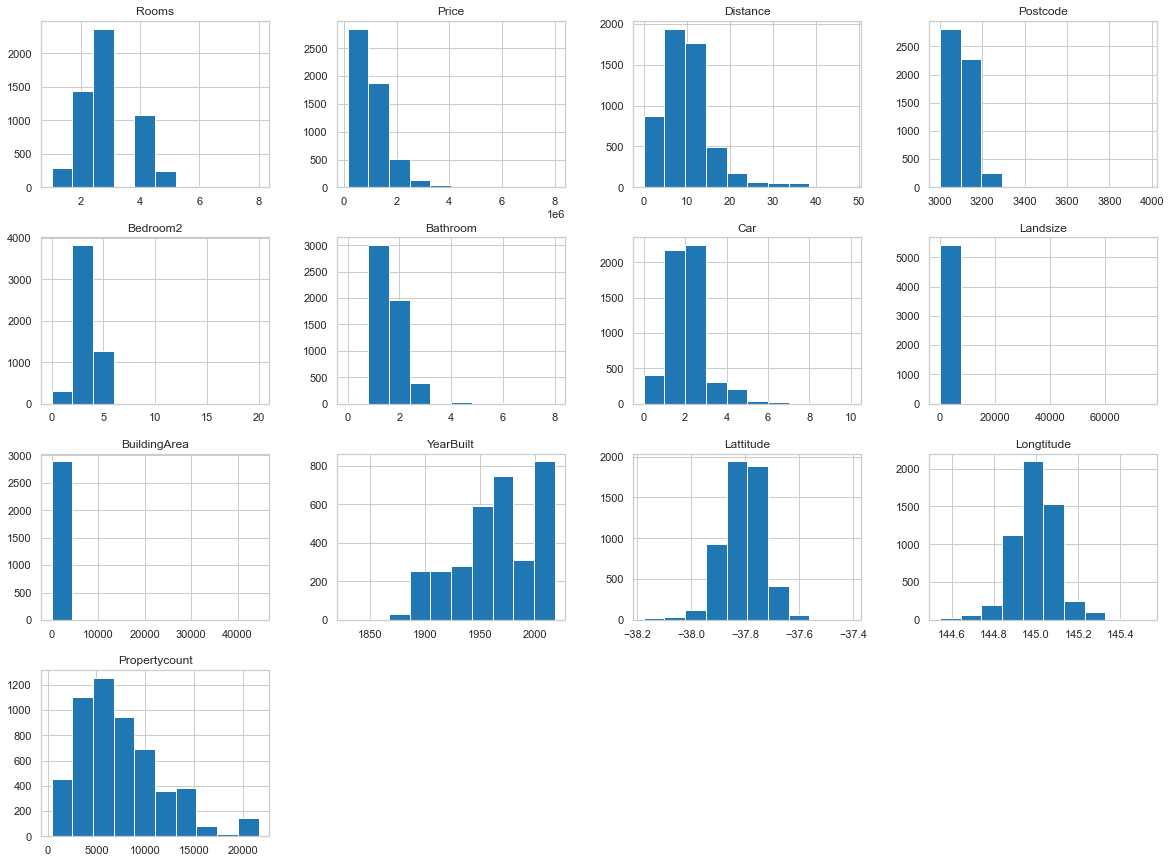

In [864]:
train_set.hist(bins=10, figsize=(20,15))
plt.show()

## Discover and visualize the data to gain insights

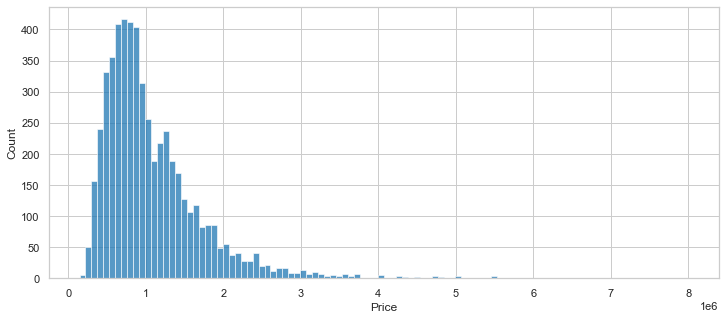

In [865]:
sns.histplot(train_set["Price"])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


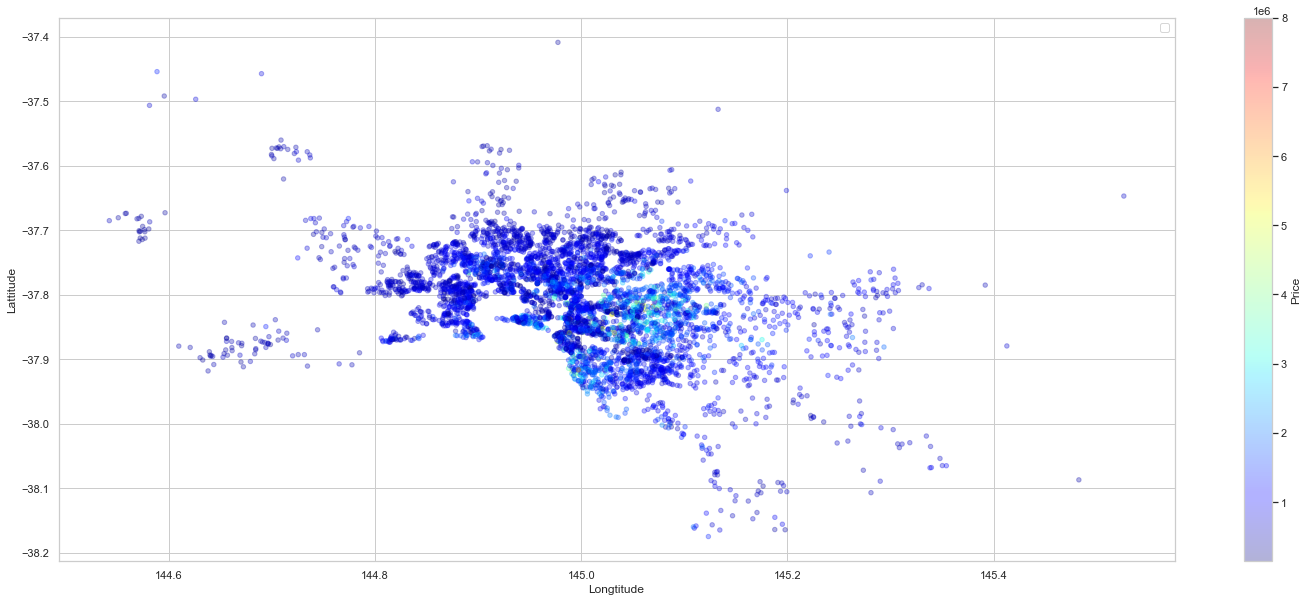

In [866]:
train_set.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.3,
             figsize=(25,10),
             c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

In [867]:
corr_matrix = train_set.corr()

In [868]:
corr_matrix["Price"].sort_values(ascending=False)

Price            1.000000
Rooms            0.494941
Bedroom2         0.460544
Bathroom         0.459137
Car              0.227902
Longtitude       0.199303
Postcode         0.093127
BuildingArea     0.061963
Landsize         0.048182
Propertycount   -0.038241
Distance        -0.167654
Lattitude       -0.206769
YearBuilt       -0.352157
Name: Price, dtype: float64

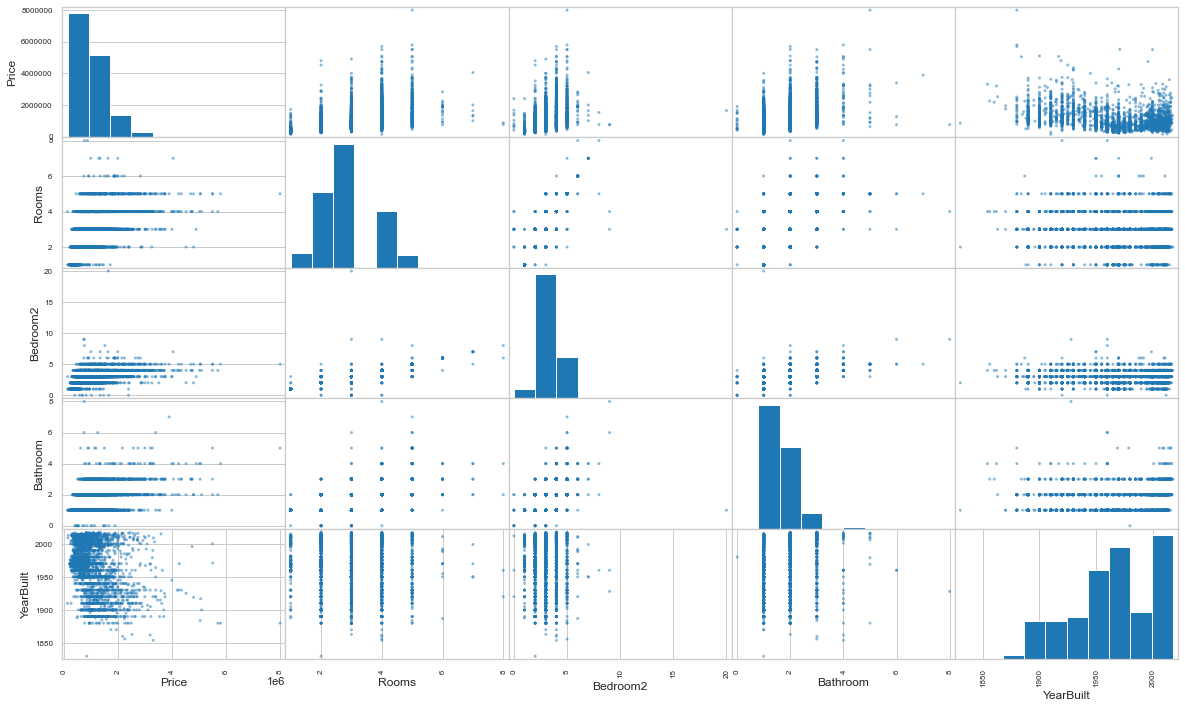

In [869]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Price", "Rooms", "Bedroom2","Bathroom",
              "YearBuilt"]
scatter_matrix(train_set[attributes], figsize=(20, 12))
plt.show()

In [870]:
# Price per Rooms: Mean, Max and Count
df=train_set[train_set.Price<=6e6].groupby('Rooms').agg({'Price':['mean', 'count', 'max','min']})
df

Price                            
               mean count        max        min
Rooms                                          
1      4.301504e+05   283  1720000.0   160000.0
2      7.811476e+05  1435  4800000.0   230000.0
3      1.072786e+06  2364  4900000.0   300000.0
4      1.454190e+06  1076  5700000.0   145000.0
5      1.875855e+06   247  5800000.0   460000.0
6      1.692167e+06    18  2835000.0   750000.0
7      1.891167e+06     6  4050000.0  1005000.0
8      8.255000e+05     2   881000.0   770000.0

In [871]:
df=test_set.groupby('Rooms').agg({'Rooms':['mean', 'count', 'max','min']})
df

Rooms              
       mean count max min
Rooms                    
1       1.0   398   1   1
2       2.0  2213   2   2
3       3.0  3517   3   3
4       4.0  1612   4   4
5       5.0   348   5   5
6       6.0    49   6   6
7       7.0     4   7   7
8       8.0     6   8   8
10     10.0     1  10  10

In [872]:
# Price per Rooms: Analysis Prices very low respect others in the same Room
train_set[train_set.Rooms==4].sort_values(ascending=True, by="Price")

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
3363,Coburg,171 Moreland Rd,4,h,145000.0,PI,Jellis,4/06/2016,7.8,3058.0,3.0,1.0,1.0,536.0,164.0,1910.0,Moreland,-37.75550,144.96580,Northern Metropolitan,11204.0
4058,Melton South,3 Francis St,4,h,347500.0,S,hockingstuart,27/05/2017,29.8,3338.0,4.0,2.0,1.0,587.0,149.0,1990.0,Melton,-37.69392,144.57468,Western Victoria,4718.0
3227,Melton South,1 Tamar Dr,4,h,355000.0,S,Raine,3/06/2017,29.8,3338.0,4.0,2.0,1.0,766.0,147.0,1980.0,Melton,-37.69791,144.58070,Western Victoria,4718.0
2528,Kurunjang,8 Carberry Dr,4,h,362000.0,SP,hockingstuart,22/07/2017,31.7,3337.0,4.0,2.0,2.0,685.0,141.0,1970.0,Melton,-37.67277,144.59643,Northern Victoria,3553.0
1783,Sunbury,13 McComb St,4,h,410000.0,PI,Brad,8/07/2017,31.7,3429.0,4.0,2.0,2.0,587.0,164.0,1986.0,Hume,-37.58231,144.69962,Western Metropolitan,14092.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,Canterbury,42 Parlington St,4,h,4750000.0,S,Kay,27/05/2017,8.4,3126.0,4.0,3.0,2.0,967.0,470.0,1996.0,Boroondara,-37.81792,145.06244,Southern Metropolitan,3265.0
1866,Camberwell,28 Kintore St,4,h,5020000.0,S,Jellis,20/05/2017,7.8,3124.0,4.0,4.0,3.0,892.0,NaN,NaN,Boroondara,-37.82300,145.06210,Southern Metropolitan,8920.0
4253,Armadale,121 Kooyong Rd,4,h,5100000.0,S,Marshall,3/09/2017,6.3,3143.0,4.0,2.0,2.0,761.0,255.0,1900.0,NaN,-37.85249,145.02091,Southern Metropolitan,4836.0


count    5.432000e+03
mean     1.078470e+06
std      6.470654e+05
min      1.450000e+05
25%      6.500000e+05
50%      9.015000e+05
75%      1.330000e+06
max      8.000000e+06
Name: Price, dtype: float64


C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


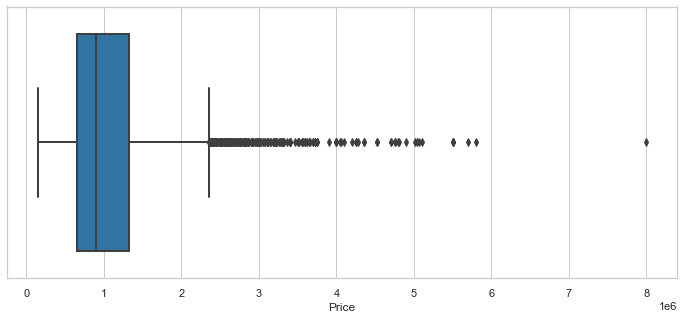

In [873]:
sns.boxplot(train_set.Price)
print(train_set.Price.describe())

In [874]:
# Review of prices with cuts to see the frequency and calculate variables
train_set["price_cat"] = pd.cut(train_set["Price"],
                               bins=[0., 1000000, 2000000., 3000000, 4000000, 5000000, 6000000, np.inf],
                               labels=["0-1e6","1e6-2e6","2e6-3e6","3e6-4e6","5e6-6e6","6e6-7e6","7e6-inf"])

In [875]:
train_set.groupby("price_cat").agg({'Price':['mean', 'count', 'max','min'], 'BuildingArea':['mean', 'count', 'max','min']})

Price                             BuildingArea        \
                   mean count        max        min         mean count   
price_cat                                                                
0-1e6      6.790416e+05  3144  1000000.0   145000.0   116.265152  1675   
1e6-2e6    1.390547e+06  1883  2000000.0  1001000.0   221.366257   982   
2e6-3e6    2.394539e+06   311  3000000.0  2004000.0   252.759537   180   
3e6-4e6    3.388771e+06    66  4000000.0  3001000.0   265.865305    40   
5e6-6e6    4.463194e+06    18  4900000.0  4050000.0   300.857143     7   
6e6-7e6    5.360111e+06     9  5800000.0  5020000.0   315.800000     5   
7e6-inf    8.000000e+06     1  8000000.0  8000000.0   464.300000     1   

                           
               max    min  
price_cat                  
0-1e6       3558.0    0.0  
1e6-2e6    44515.0    0.0  
2e6-3e6     3112.0    0.0  
3e6-4e6      502.0    5.0  
5e6-6e6      470.0  159.0  
6e6-7e6      378.0  255.0  
7e6-inf      464.3  464.3

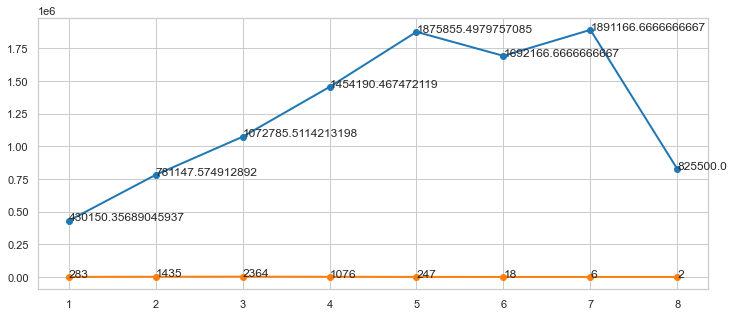

In [876]:
room_avg_price = train_set[train_set.Price<6e6].groupby('Rooms').mean().Price.reset_index()
room_count_price = train_set[train_set.Price<6e6].groupby('Rooms').count().Price.reset_index()
unique_rooms=np.unique(train_set.Rooms)
plt.plot(unique_rooms, room_avg_price.Price, marker='o')
for x, y in zip(unique_rooms, room_avg_price.Price):
    plt.annotate(text=str(y)[:], xy=(x, y))
plt.plot(unique_rooms, room_count_price.Price, marker='o')
for x, y in zip(unique_rooms, room_count_price.Price):
    plt.annotate(text=str(y), xy=(x, y))
plt.show()

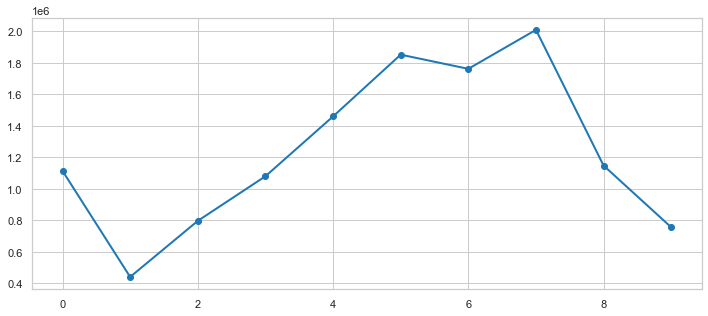

In [877]:
# Average of Price vs Rooms
bedrooms_avg_price = train_set[train_set.Bedroom2<19].groupby('Bedroom2').mean().Price.reset_index()
plt.plot(bedrooms_avg_price.Bedroom2, bedrooms_avg_price.Price, marker='o')

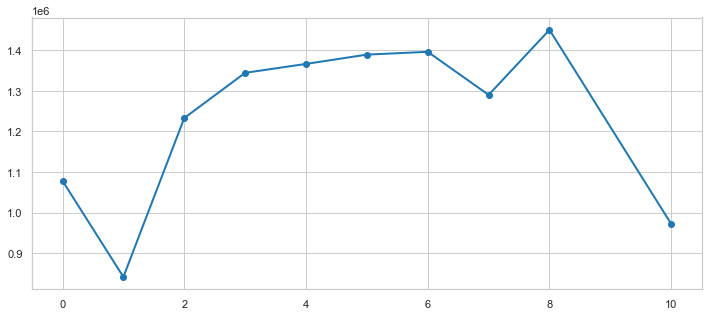

In [878]:
# Average of Price vs Bedrooms
car_avg_price = train_set.groupby('Car').mean().Price.reset_index()
plt.plot(car_avg_price.Car, car_avg_price.Price, marker='o')

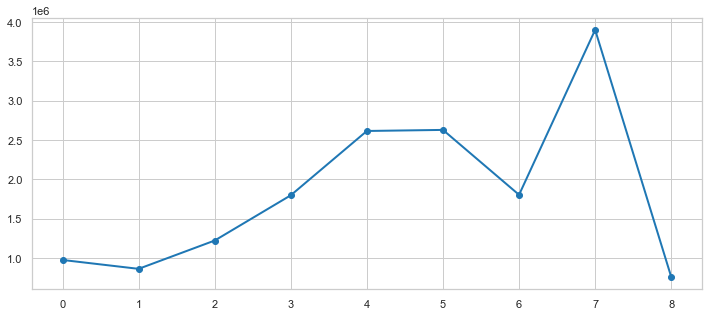

In [879]:
# Average of Price vs Bathrooms
bath_avg_price = train_set.groupby('Bathroom').mean().Price.reset_index()
plt.plot(bath_avg_price.Bathroom, bath_avg_price.Price, marker='o')

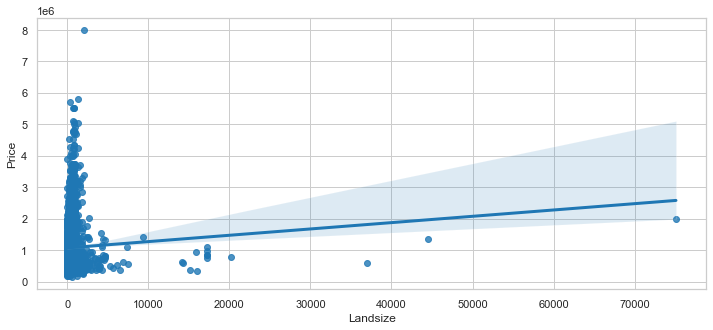

In [880]:
## Plot landsize vs Price
sns.regplot(data=train_set, x="Landsize", y="Price")
plt.show()

C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Landsize'>

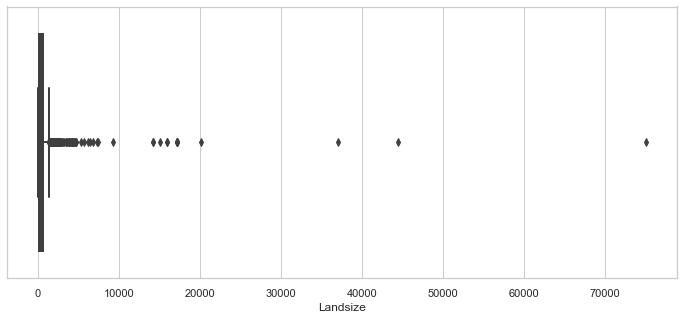

In [881]:
sns.boxplot(train_set.Landsize)

In [882]:
train_set.loc[train_set.Landsize>70000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,price_cat
index,,,,,,,,,,,,,,,,,,,,,,
2324,Balwyn North,9 Gildan St,3,h,2000000.0,VB,Kay,28/08/2016,9.2,3104.0,3.0,1.0,2.0,75100.0,NaN,NaN,Boroondara,-37.8002,145.07,Southern Metropolitan,7809.0,1e6-2e6


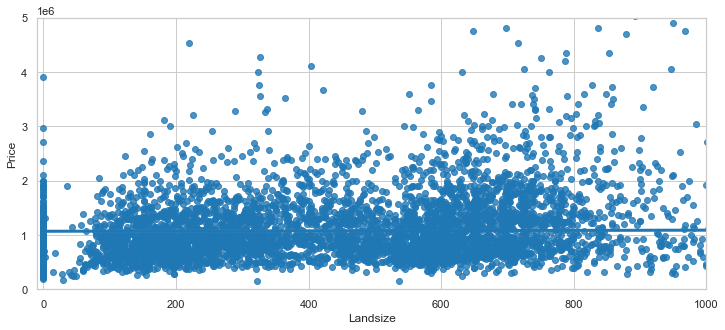

In [883]:
sns.regplot(data=train_set, x="Landsize", y="Price")
plt.axis([-10, 1000, 0, 5e6])
plt.show()

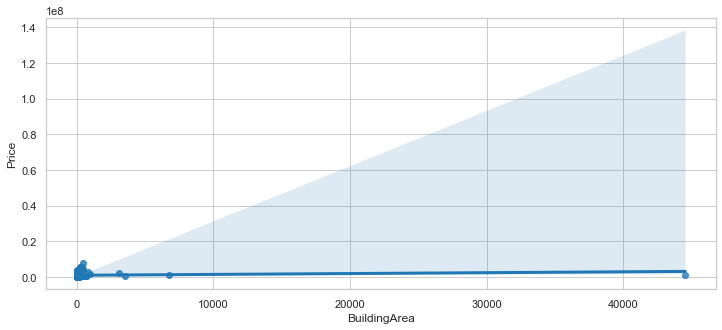

In [884]:
## Let's see BuildingArea
sns.regplot(data=train_set, x="BuildingArea", y="Price")
plt.show()

In [885]:
train_set[train_set.BuildingArea>40000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,price_cat
index,,,,,,,,,,,,,,,,,,,,,,
2521,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438.0,5.0,3.0,5.0,44500.0,44515.0,NaN,NaN,-37.45392,144.58864,Northern Victoria,849.0,1e6-2e6


C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BuildingArea'>

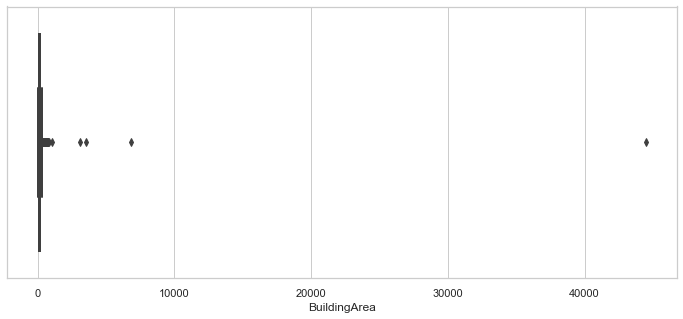

In [886]:
sns.boxplot(train_set.BuildingArea)

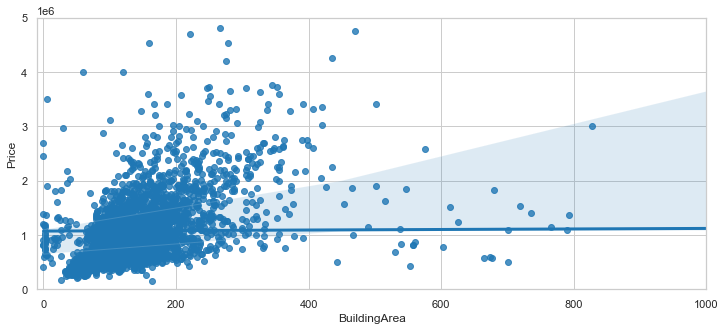

In [887]:
sns.regplot(data=train_set, x="BuildingArea", y="Price",)
plt.axis([-10, 1000, 0, 5e6])
plt.show()

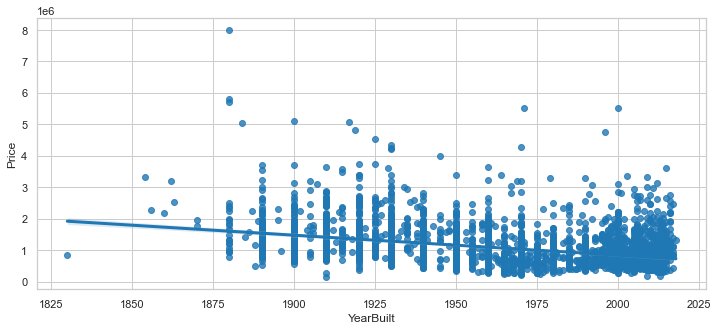

In [888]:
sns.regplot(data=train_set, x="YearBuilt", y="Price",)
plt.show()

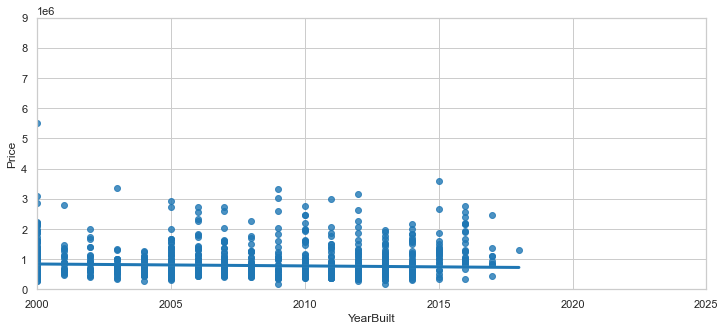

In [889]:
sns.regplot(data=train_set, x="YearBuilt", y="Price",)
plt.axis([2000, 2025, 0, 9e6])
plt.show()

C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearBuilt'>

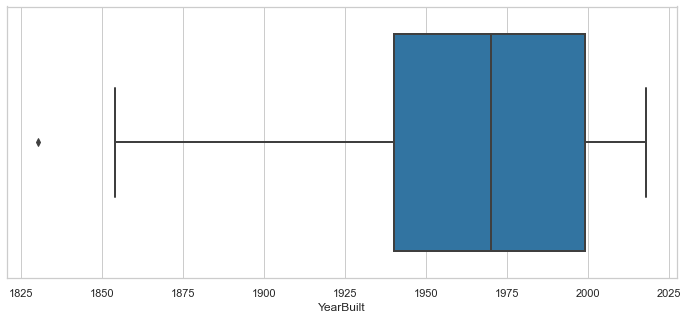

In [890]:
sns.boxplot(train_set.YearBuilt)

In [891]:
## Now there is no 0 but NaNs.. NaNs are not displayed, neither taked into account to estimate the fit
train_set[['Price','Landsize','BuildingArea']].head(10)

,Price,Landsize,BuildingArea
index,,,
0,1380000.0,766.0,NaN
1,1100000.0,189.0,NaN
2,1480000.0,605.0,116.0
3,1055000.0,324.0,NaN
4,1000000.0,728.0,164.0
5,650000.0,136.0,81.0
6,1510000.0,370.0,NaN
7,600000.0,204.0,124.0
8,1260000.0,654.0,150.0


C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Car'>

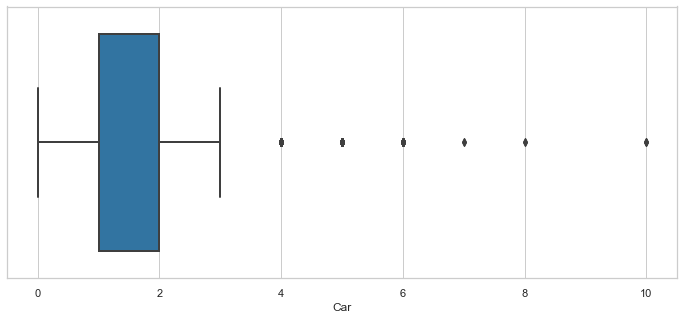

In [892]:
sns.boxplot(train_set.Car)

(0.0, 10000.0, 0.0, 50.0)

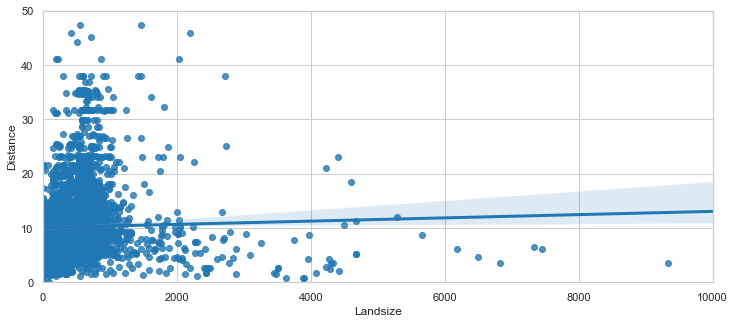

In [893]:
sns.regplot(data=train_set, y="Distance", x="Landsize")
plt.axis([0, 10000, 0, 50])

C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance'>

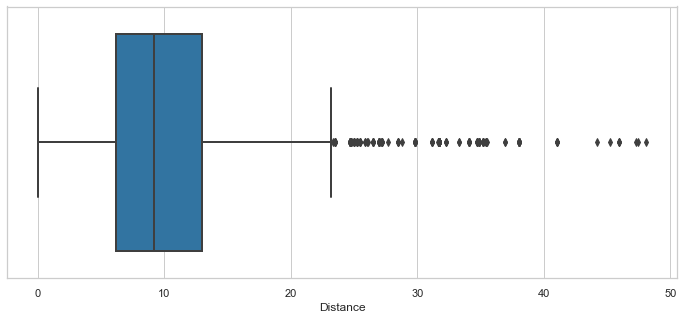

In [894]:
sns.boxplot(train_set.Distance)

In [895]:
# print those categorical features
train_set.select_dtypes(include=['object']).head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
index,,,,,,,,
0,Aberfeldie,241 Buckley St,h,VB,Nelson,12/08/2017,Moonee Valley,Western Metropolitan
1,Northcote,67 Charles St,h,SP,Jellis,20/05/2017,Darebin,Northern Metropolitan
2,Balwyn North,42 Maud St,h,PI,Jellis,15/10/2016,Boroondara,Southern Metropolitan
3,Brunswick,13 Percy St,h,S,Nelson,7/05/2016,Moreland,Northern Metropolitan
4,Templestowe Lower,253 Thompsons Rd,h,VB,hockingstuart,13/08/2016,Manningham,Eastern Metropolitan


mse with knn( 30 ): 47389.613610140936 -0.06799541171855905


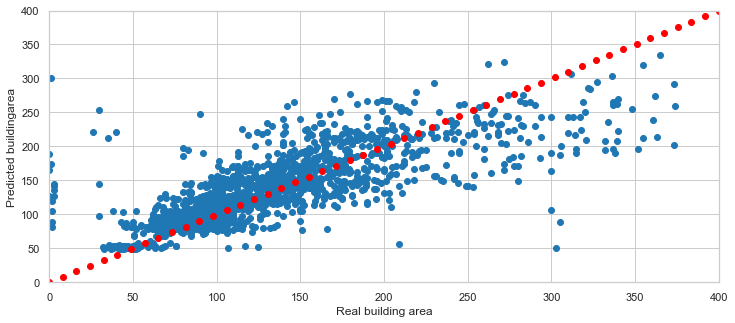

In [896]:
# It looks like BuildingArea affects price quite a lot, but there are many rows with NaN values for this parameter --> We will use a predictor for this parameter to input values to missing data
# according to the location of the house and the number of bathrooms and bedrooms it has
# Since this does not depend on price, we will train the predictor using al non-nan rows of both the train and test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

predictor_set = pd.concat([train_set.drop('Price', inplace=False, axis = 1), test_set])

building_train = predictor_set[predictor_set['BuildingArea'].isna() == False]

param_list = ['Lattitude', 'Longtitude', 'Bedroom2', 'Bathroom', 'Distance']

bdata_train, bdata_val, blabel_train, blabel_val = \
    train_test_split(building_train[param_list], building_train['BuildingArea'], test_size=0.2, random_state=6)


n_neighbors = 30
knn = KNeighborsRegressor(n_neighbors)

knn.fit(bdata_train, blabel_train)

prediction = knn.predict(bdata_val)

print('mse with knn(', n_neighbors,'):', mean_squared_error(blabel_val, prediction), r2_score(blabel_val, prediction))

plt.scatter(blabel_val, prediction)
plt.scatter(np.linspace(0,400), np.linspace(0,400), color = 'red')
plt.xlim(0,400)
plt.ylim(0,400)

plt.xlabel('Real building area')
plt.ylabel('Predicted buildingarea')

plt.show()
# The linear model works pretty bad in this case, so we are gonna stick with the k neighbors model
# lr = LinearRegression()

# lr.fit(bdata_train, blabel_train)

# prediction = lr.predict(bdata_val)

# print('mse with lr:', mean_squared_error(blabel_val, prediction), r2_score(blabel_val, prediction))

mse with random forest 44301.32076094693 0.001603859972413857


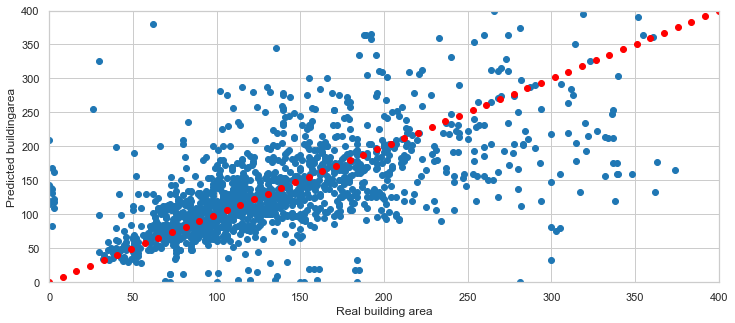

In [897]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


predictor_set = pd.concat([train_set.drop('Price', inplace=False, axis = 1), test_set])

building_train = predictor_set[predictor_set['BuildingArea'].isna() == False]

param_list = ['Lattitude', 'Longtitude', 'Bedroom2', 'Bathroom', 'Distance']

bdata_train, bdata_val, blabel_train, blabel_val = \
    train_test_split(building_train[param_list], building_train['BuildingArea'], test_size=0.2, random_state=6)


forest_reg = DecisionTreeRegressor(random_state=42)

forest_reg.fit(bdata_train, blabel_train)

prediction = forest_reg.predict(bdata_val)

print('mse with random forest', mean_squared_error(blabel_val, prediction), r2_score(blabel_val, prediction))

plt.scatter(blabel_val, prediction)
plt.scatter(np.linspace(0,400), np.linspace(0,400), color = 'red')
plt.xlim(0,400)
plt.ylim(0,400)

plt.xlabel('Real building area')
plt.ylabel('Predicted buildingarea')

plt.show()

In [898]:
predictor_set = pd.concat([train_set.drop('Price', inplace=False, axis = 1), test_set])

building_train = predictor_set[predictor_set['BuildingArea'].isna() == False]



param_list = ['Lattitude', 'Longtitude', 'Bedroom2', 'Bathroom', 'Distance']

n_neighbors = 30
buildingarea_predictor = KNeighborsRegressor(n_neighbors)

buildingarea_predictor.fit(building_train[param_list], building_train['BuildingArea'])

KNeighborsRegressor(n_neighbors=30)

In [899]:
train_ba_na = train_set[train_set['BuildingArea'].isna()]
train_ba_not_na = train_set[train_set['BuildingArea'].isna() == False]


predictedna = buildingarea_predictor.predict(train_ba_na[param_list])

train_ba_na['BuildingArea'] = predictedna

train_set_ba_pred = pd.concat([train_ba_na, train_ba_not_na]).sort_index()


test_ba_na = test_set[test_set['BuildingArea'].isna()]
test_ba_not_na = test_set[test_set['BuildingArea'].isna() == False]


predictedna = buildingarea_predictor.predict(test_ba_na[param_list])

test_ba_na['BuildingArea'] = predictedna

test_set_ba_pred = pd.concat([test_ba_na, test_ba_not_na]).sort_index()

C:\Users\Anderson\AppData\Local\Temp\ipykernel_14572\3144657597.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ba_na['BuildingArea'] = predictedna
C:\Users\Anderson\AppData\Local\Temp\ipykernel_14572\3144657597.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_ba_na['BuildingArea'] = predictedna


In [900]:
train_set_ba_pred.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,price_cat
index,,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,189.800000,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0,1e6-2e6
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,94.533333,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0,1e6-2e6
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.000000,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0,1e6-2e6
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,147.593333,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0,1e6-2e6
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.000000,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0,0-1e6


In [901]:
test_set_ba_pred.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,
0,Brighton,1a Mair St,3,h,S,Buxton,6/08/2016,11.2,3186.0,3.0,2.0,3.0,588.0,162.233333,NaN,Bayside,-37.9287,144.9920,Southern Metropolitan,10579.0
1,West Melbourne,5/467 King St,2,u,S,Jellis,28/05/2016,1.9,3003.0,2.0,1.0,1.0,0.0,83.000000,2002.0,Melbourne,-37.8091,144.9520,Northern Metropolitan,2230.0
2,St Kilda,7/29 Marine Pde,3,u,SP,McGrath,22/04/2017,6.1,3182.0,3.0,1.0,0.0,0.0,115.000000,1930.0,Port Phillip,-37.8718,144.9767,Southern Metropolitan,13240.0
3,Pascoe Vale,8/16 Pascoe St,3,t,VB,Trimson,18/06/2016,9.9,3044.0,3.0,2.0,1.0,146.0,106.000000,2006.0,Moreland,-37.7152,144.9346,Northern Metropolitan,7485.0
4,South Kingsville,2/77 Vernon St,2,h,SP,Gunn&Co,24/09/2016,9.1,3015.0,2.0,1.0,2.0,462.0,91.943333,1970.0,Hobsons Bay,-37.8331,144.8715,Western Metropolitan,984.0


mse with knn( 30 ): 1092.7602312475021 0.17529097027691087


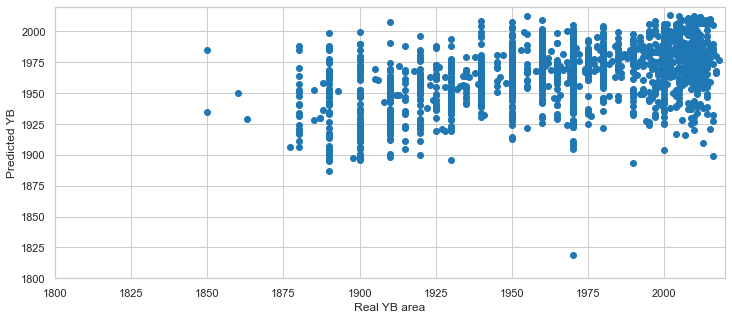

In [902]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

predictor_set = pd.concat([train_set_ba_pred.drop('Price', inplace=False, axis = 1), test_set_ba_pred])

yearbuilt_train = predictor_set[(predictor_set['YearBuilt'].isna() == False) & (predictor_set['YearBuilt']<2020)]

param_list = ['Lattitude', 'Longtitude', 'Distance']

ybdata_train, ybdata_val, yblabel_train, yblabel_val = \
    train_test_split(yearbuilt_train[param_list], yearbuilt_train['YearBuilt'], test_size=0.2, random_state=6)



knn = RandomForestRegressor(n_estimators=20, random_state=42)

knn.fit(ybdata_train, yblabel_train)

prediction = knn.predict(ybdata_val)

print('mse with knn(', n_neighbors,'):', mean_squared_error(yblabel_val, prediction), r2_score(yblabel_val, prediction))

plt.scatter(yblabel_val, prediction)
plt.scatter(np.linspace(0,400), np.linspace(0,400), color = 'red')


plt.xlabel('Real YB area')
plt.ylabel('Predicted YB')

plt.xlim(1800,2020)
plt.ylim(1800,2020)

plt.show()

mse with lr: 1237.8521599345456 0.06578970887802171


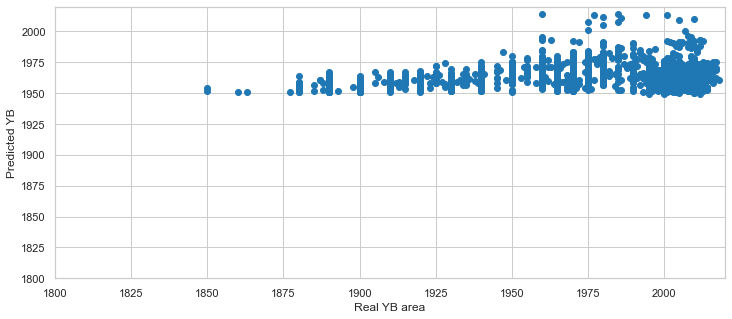

In [903]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

predictor_set = pd.concat([train_set_ba_pred.drop('Price', inplace=False, axis = 1), test_set_ba_pred])

yearbuilt_train = predictor_set[(predictor_set['YearBuilt'].isna() == False) & (predictor_set['YearBuilt']<2020)]

param_list = ['Lattitude', 'Longtitude', 'Distance']

ybdata_train, ybdata_val, yblabel_train, yblabel_val = \
    train_test_split(yearbuilt_train[param_list], yearbuilt_train['YearBuilt'], test_size=0.2, random_state=6)


lr = LinearRegression()

lr.fit(ybdata_train, yblabel_train)

prediction = lr.predict(ybdata_val)

print('mse with lr:', mean_squared_error(yblabel_val, prediction), r2_score(yblabel_val, prediction))

plt.scatter(yblabel_val, prediction)
plt.scatter(np.linspace(0,400), np.linspace(0,400), color = 'red')


plt.xlabel('Real YB area')
plt.ylabel('Predicted YB')

plt.xlim(1800,2020)
plt.ylim(1800,2020)

plt.show()

In [904]:
test_set_ba_pred.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,
0,Brighton,1a Mair St,3,h,S,Buxton,6/08/2016,11.2,3186.0,3.0,2.0,3.0,588.0,162.233333,NaN,Bayside,-37.9287,144.9920,Southern Metropolitan,10579.0
1,West Melbourne,5/467 King St,2,u,S,Jellis,28/05/2016,1.9,3003.0,2.0,1.0,1.0,0.0,83.000000,2002.0,Melbourne,-37.8091,144.9520,Northern Metropolitan,2230.0
2,St Kilda,7/29 Marine Pde,3,u,SP,McGrath,22/04/2017,6.1,3182.0,3.0,1.0,0.0,0.0,115.000000,1930.0,Port Phillip,-37.8718,144.9767,Southern Metropolitan,13240.0
3,Pascoe Vale,8/16 Pascoe St,3,t,VB,Trimson,18/06/2016,9.9,3044.0,3.0,2.0,1.0,146.0,106.000000,2006.0,Moreland,-37.7152,144.9346,Northern Metropolitan,7485.0
4,South Kingsville,2/77 Vernon St,2,h,SP,Gunn&Co,24/09/2016,9.1,3015.0,2.0,1.0,2.0,462.0,91.943333,1970.0,Hobsons Bay,-37.8331,144.8715,Western Metropolitan,984.0


mse with knn( 30 ): 0.7829672329573472 0.1324938119595691


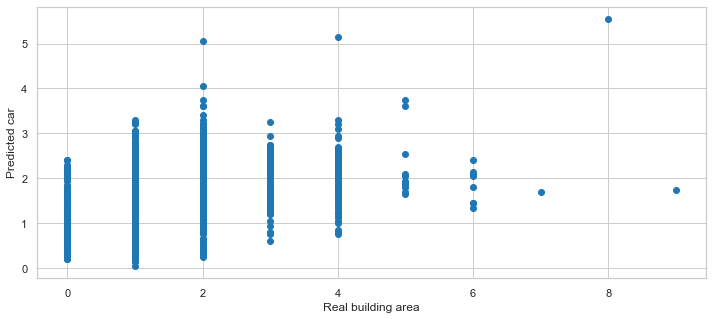

In [905]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

predictor_set = pd.concat([train_set_ba_pred.drop('Price', inplace=False, axis = 1), test_set_ba_pred])



car_train = predictor_set[predictor_set['Car'].isna() == False]

param_list = ['BuildingArea', 'Lattitude', 'Longtitude', 'Bedroom2', 'Bathroom', 'Distance']

ldata_train, ldata_val, llabel_train, llabel_val = \
    train_test_split(car_train[param_list], car_train['Car'], test_size=0.2, random_state=6)


n_neighbors = 30
knn = RandomForestRegressor(n_estimators=20, random_state=42)

knn.fit(ldata_train, llabel_train)

prediction = knn.predict(ldata_val)

print('mse with knn(', n_neighbors,'):', mean_squared_error(llabel_val, prediction), r2_score(llabel_val, prediction))

plt.scatter(llabel_val, prediction)



plt.xlabel('Real building area')
plt.ylabel('Predicted car')


plt.show()

#For the l attribute is way better to fill in 

(0.0, 1000.0)

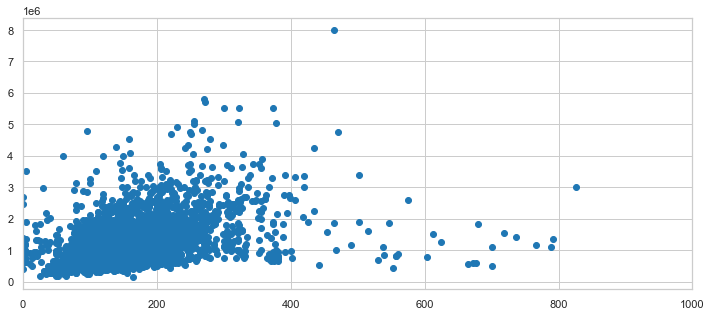

In [906]:
plt.scatter(train_set_ba_pred['BuildingArea'], train_set_ba_pred['Price'])

plt.xlim(0,1000)

It would be interesting to visualize all features (numerical and catergorical) in order to undertand them.

Check out this blog for plotting distribution: https://seaborn.pydata.org/tutorial/distributions.html

Seaborn version of this blog can be different from the one intalled in your machine (version 0.11 has been just realeased) Check out this blog for plotting categorical data: https://seaborn.pydata.org/tutorial/categorical.html

# Prepare the data for Machine Learning algorithms

In [907]:
# Filter train_set
train_set=train_set.loc[train_set.Bedroom2<19]
train_set=train_set.loc[train_set.BuildingArea<2000]
train_set=train_set.loc[train_set.Landsize<20000]
train_set=train_set.loc[train_set.Price<5.5e6]
train_set=train_set.loc[train_set.YearBuilt>1850]

In [908]:
# Clasify datasets
train_set["set"]="train"
test_set["set"]="test"

In [909]:
# Delete columns
train_set_wprice = train_set.drop("Price", axis=1)
housing_labels = train_set["Price"].copy()

In [910]:
# Join train_set and test_set
print("train_set:",train_set_wprice.shape[0], "regitros")
print("test_set:",test_set.shape[0], "registros")
frames = [train_set_wprice, test_set]
data_set = pd.concat(frames)
print("data_set:",data_set.shape[0], "registros")

train_set: 2757 regitros
test_set: 8148 registros
data_set: 10905 registros


In [911]:
import datetime
format_str = '%d/%m/%Y' # The format

# Create new columns (Train & Test)
def preprocessing(dt):
    dt["id"] = dt["Longtitude"] * 1000 + dt["Lattitude"]
    dt["id"] = dt["id"].astype('str') + dt["Address"]

    dt["Year"]=[datetime.datetime.strptime(d, format_str).date().year for d in dt.Date]
    dt["Month"]=[datetime.datetime.strptime(d, format_str).date().month for d in dt.Date]
    dt["YearMonth"]=[int(str(y)+""+ str(m).zfill(2)) for y,m in zip(dt.Year,dt.Month)]    
    
    dt["Street"]=[d for d in dt.Address]
    dt["Street"]=dt["Street"].str.replace('\d+', '')
    dt["Street"]=dt["Street"].str.replace('\/+', '')
    dt["Street"]=dt["Street"].str.strip()
    
    #dt[dt==0]=np.nan
    dt.YearBuilt.replace(0, np.nan, inplace=True)
    dt.Landsize.replace(0, np.nan, inplace=True)
    dt.BuildingArea.replace(0, np.nan, inplace=True)
    
    median_yearbuilt = dt[dt.set=="train"]["YearBuilt"].median()
    dt["YearBuilt"].fillna(median_yearbuilt, inplace=True)
    
    median_building = dt[dt.set=="train"]["BuildingArea"].median()
    dt["BuildingArea"].fillna(median_building, inplace=True)
    #dt['BuildingArea'].fillna(dt.groupby('Suburb')['BuildingArea'].transform('mean'), inplace=True)
    
    median_landsize = dt[dt.set=="train"]["Landsize"].median()
    dt["Landsize"].fillna(median_landsize, inplace=True)
    
    dt["BuildingArea"]=np.sqrt(dt["BuildingArea"]) # m^2

    dt["Landsize"]=np.sqrt(dt["Landsize"]) # m^2
    
    median_car = dt[dt.set=="train"]["Car"].median()
    dt["Car"].fillna(median_car, inplace=True)
    
    median_bedroom2 = dt[dt.set=="train"]["Bedroom2"].median()
    dt["Bedroom2"].fillna(median_bedroom2, inplace=True)
    
    dt["RoomsCat"] = pd.cut(dt["Rooms"],bins=[0., 5, 15, np.inf],labels=[20, 1, 0]).astype('int64')
        
    dt["HouseYears"] = dt.Year-dt.YearBuilt #years of the house
    mean_years = dt[(dt.set=="train") & (dt.HouseYears>0)]["HouseYears"].mean()
    dt["HouseYears"].mask(dt.HouseYears < 0)
    dt["HouseYears"].fillna(mean_years, inplace=True)
    
    dt["Postcode"]=pd.Categorical(dt.Postcode)
    
    #dt.select_dtypes(exclude=[np.number]).fillna('Unknown', inplace=True)
    
    return dt

In [912]:
data_set = preprocessing(data_set)
data_set.head()

C:\Users\Anderson\AppData\Local\Temp\ipykernel_14572\1702840685.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  dt["Street"]=dt["Street"].str.replace('\d+', '')
C:\Users\Anderson\AppData\Local\Temp\ipykernel_14572\1702840685.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  dt["Street"]=dt["Street"].str.replace('\/+', '')


,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,price_cat,set,id,Year,Month,YearMonth,Street,RoomsCat,HouseYears
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,Balwyn North,42 Maud St,3,h,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,24.596748,10.770330,1950.0,Boroondara,-37.7951,145.0696,Southern Metropolitan,7809.0,1e6-2e6,train,145031.8049000000242 Maud St,2016,10,201610,Maud St,20,66.0
4,Templestowe Lower,253 Thompsons Rd,4,h,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,26.981475,12.806248,1970.0,Manningham,-37.7680,145.1027,Eastern Metropolitan,5420.0,0-1e6,train,145064.932253 Thompsons Rd,2016,8,201608,Thompsons Rd,20,46.0
5,Coburg,4/34 Gladstone St,2,u,S,Barry,29/04/2017,7.8,3058.0,2.0,1.0,1.0,11.661904,9.000000,1975.0,Moreland,-37.7449,144.9754,Northern Metropolitan,11204.0,0-1e6,train,144937.65514/34 Gladstone St,2017,4,201704,Gladstone St,20,42.0
7,Pascoe Vale,5/10 Dorset Rd,3,u,S,Nelson,4/03/2017,9.9,3044.0,3.0,1.0,1.0,14.282857,11.135529,2008.0,Moreland,-37.7234,144.9497,Northern Metropolitan,7485.0,0-1e6,train,144911.976600000025/10 Dorset Rd,2017,3,201703,Dorset Rd,20,9.0
8,Preston,23 Dean St,4,h,SP,Nelson,14/05/2016,8.8,3072.0,4.0,3.0,2.0,25.573424,12.247449,1950.0,Darebin,-37.7365,145.0173,Northern Metropolitan,14577.0,1e6-2e6,train,144979.5635000000223 Dean St,2016,5,201605,Dean St,20,66.0


In [913]:
sample_incomplete_rows = data_set[data_set.isnull().any(axis=1)]
print(data_set.shape[0],sample_incomplete_rows.shape[0])
sample_incomplete_rows.head()

10905 8416


,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,price_cat,set,id,Year,Month,YearMonth,Street,RoomsCat,HouseYears
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20,Greensborough,6 Murumba St,4,h,S,Morrison,16/09/2017,16.1,3088.0,4.0,2.0,2.0,27.092434,14.525839,1980.0,NaN,-37.69290,145.12720,Northern Metropolitan,8524.0,0-1e6,train,145089.50716 Murumba St,2017,9,201709,Murumba St,20,37.0
82,Bentleigh,4 Clairmont Av,4,h,S,Jellis,16/09/2017,11.4,3204.0,4.0,3.0,2.0,23.600847,15.264338,1940.0,NaN,-37.92098,145.02422,Southern Metropolitan,6795.0,2e6-3e6,train,144986.299024 Clairmont Av,2017,9,201709,Clairmont Av,20,77.0
157,Reservoir,1 Don St,4,h,S,RW,26/08/2017,12.0,3073.0,4.0,2.0,10.0,31.654384,13.038405,1985.0,NaN,-37.70671,145.03086,Northern Metropolitan,21650.0,1e6-2e6,train,144993.153290000051 Don St,2017,8,201708,Don St,20,32.0
182,Elsternwick,8 Prentice St,3,h,S,Biggin,19/08/2017,7.2,3185.0,3.0,2.0,1.0,18.601075,13.416408,1890.0,NaN,-37.88319,145.01142,Southern Metropolitan,4898.0,2e6-3e6,train,144973.536818 Prentice St,2017,8,201708,Prentice St,20,127.0
233,Niddrie,1 Cuthbert St,2,h,S,Frank,23/09/2017,10.4,3042.0,2.0,1.0,2.0,18.761663,9.110434,1950.0,NaN,-37.73610,144.88306,Western Metropolitan,2291.0,0-1e6,train,144845.32391 Cuthbert St,2017,9,201709,Cuthbert St,20,67.0


In [914]:
data_set.columns[data_set.isna().any()].tolist()

['CouncilArea', 'price_cat']

In [915]:
data_set.isna().sum().sort_values(ascending=False)

price_cat      8148
CouncilArea    1084
Suburb            0
RoomsCat          0
Street            0
               ... 
SellerG           0
Method            0
Type              0
Rooms             0
HouseYears        0
Length: 29, dtype: int64

C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BuildingArea'>

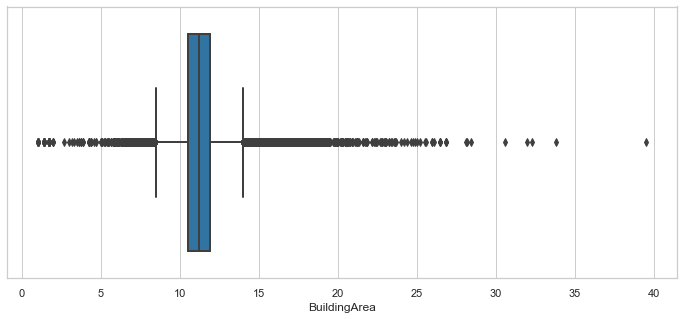

In [916]:
sns.boxplot(data_set.BuildingArea) # According to the chart, we will use the median
# sns.distplot(train_set.BuildingArea)

C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearBuilt'>

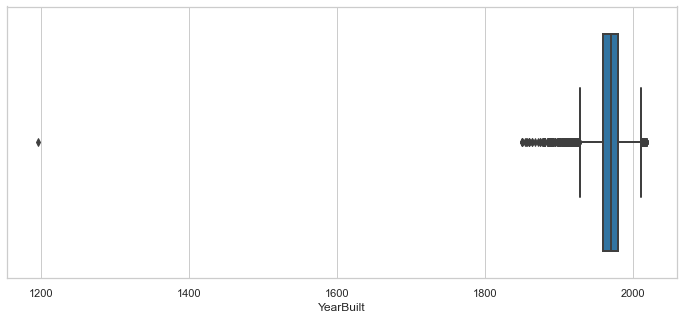

In [917]:
sns.boxplot(data_set.YearBuilt)

### Categorical data

Now let's preprocess the categorical input feature, CouncilArea:

# Prediction part


Explain the choosed model and why you think that is is the best:


## EXERCICE - TRAIN A MODE, and upload your best solution to the Kaggle Challenge

Tasks: 
+ Clean and trasform the data
+ Choose the best features for the problem. Some features are numercial but others categorical, think how to codify all of them.
+ Choose the model. You have two choice: LinearRegression and KNeighborsRegressor
    + You can chanege the paramenter n_neighbors from the KNeighborsRegressor
    
LINEAR REGRESSOR:
>from sklearn.linear_model import LinearRegression

>model = LinearRegression()

KNeighborsRegressor
> from sklearn import neighbors

> n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)

> model = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)


## Select and train a model

### Linear Regression

In [918]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
Rooms_ix, Bedroom2_ix, Bathroom_ix, BuildingArea_ix = 0, 1, 2, 3#2, 3, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        rooms_per_building_area = X[:, Rooms_ix] / (1.0 +X[:, BuildingArea_ix])# add 1 to avoid 0 division
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, Bedroom2_ix] / (1.0 + X[:, Rooms_ix]) # add 1 to avoid 0 division
            bathrooms_per_room = X[:, Bathroom_ix] / (1.0 + X[:, Rooms_ix]) # add 1 to avoid 0 division
            return np.c_[X, rooms_per_building_area,bedrooms_per_room,bathrooms_per_room]
            #return np.c_[X, rooms_per_building_area,bedrooms_per_room, bedrooms_per_area]
        else:
            return np.c_[X, rooms_per_building_area]

In [919]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

## create a function to replace 0 by NaN
def replace_0_2_NaN(data):
    data[data == 0] = np.nan
    return data


num0_pipeline = Pipeline([
        #('zeros2NaN',FunctionTransformer(func = replace_0_2_NaN,validate=False)),
        ('imputer', SimpleImputer(strategy="median")),
        ('log',FunctionTransformer(np.log1p, validate=True)),
        ('std_scaler', StandardScaler()),
    ])

In [920]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

In [921]:
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="constant",fill_value='Unknown')),
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore')),
    ])

In [922]:
from category_encoders import TargetEncoder
cat_pipeline_target = Pipeline([
        ('imputer', SimpleImputer(strategy="constant",fill_value='Unknown')),
        ('one_target_encoder', TargetEncoder(min_samples_leaf=20, smoothing=5)),
    ])

In [925]:
from sklearn.compose import ColumnTransformer

## the features

tr_set=data_set.loc[data_set.set=="train"]
train_set_num = tr_set.select_dtypes(include=[np.number])
num_attribs0 = ['Landsize','BuildingArea','Car','YearBuilt',"RoomsCat"]
num_attribs1 = list(train_set_num[['Rooms',
 #'Distance',
 'Bedroom2',
 'Bathroom',
 #'Car',
 #'Landsize',
 'BuildingArea',
 #'YearBuilt',
 'Lattitude',
 'Longtitude',
 #'Propertycount',
 #'Year',
 #'Month',
 #'YearMonth',
 #'RoomsCat',
 #'HouseYears'
 ]])
cat_attribs = ['Type','Method',"Suburb","Postcode","CouncilArea"]
cat_attribs_targetenc = ['Street',"SellerG"]


full_pipeline = ColumnTransformer([
        ("num0", num0_pipeline, num_attribs0),
        ("num1", num_pipeline, num_attribs1),
        ("cat", cat_pipeline, cat_attribs),
        ("cat1", cat_pipeline_target, cat_attribs_targetenc),  
    
    ])

housing_prepared = full_pipeline.fit_transform(tr_set, y=housing_labels)

housing_prepared

<2757x497 sparse matrix of type '<class 'numpy.float64'>'
	with 57897 stored elements in Compressed Sparse Row format>

In [ ]:
housing_prepared.shape

In [ ]:
## the model
from sklearn.linear_model import LinearRegression

## fit the model

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

## predict training set

housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",lin_rmse)
print("R^2: ",r2_score(housing_labels, housing_predictions))


## Evaluate the model and plot it

y = housing_labels
y_pred=housing_predictions
plt.scatter(y, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price');
plt.show()

#291430.0660089339

In [ ]:
negative_number = [ number for number in housing_predictions if number<0]
print(len(negative_number))

In [362]:
### K-Nearest Neighbour

In [363]:
from sklearn import neighbors

n_neighbors = 3
knn_reg = neighbors.KNeighborsRegressor(n_neighbors)
knn_reg.fit(housing_prepared, housing_labels)

KNeighborsRegressor(n_neighbors=3)

In [364]:
housing_predictions = knn_reg.predict(housing_prepared)
knn_mse = mean_squared_error(housing_labels, housing_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

312467.5188848836

## Fine-tune your model

### Validation

In [365]:
from sklearn.model_selection import cross_val_score

def display_scores(scores,model_name = None):
    if(model_name):
        print("----",model_name,"----")
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [366]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_root_mean_squared_error", cv=10)
display_scores(-lin_scores,'Linear Regression')

---- Linear Regression ----
Mean: 312388.3960151242
Standard deviation: 18446.110477822418


In [367]:
knn_scores = cross_val_score(knn_reg, housing_prepared, housing_labels,
                             scoring="neg_root_mean_squared_error", cv=10)
display_scores(-knn_scores,'Knn Regression')

---- Knn Regression ----
Mean: 452608.3152719733
Standard deviation: 28927.727694872294


In [368]:
results = pd.Series(-lin_scores)

In [369]:
results.describe()

count        10.000000
mean     312388.396015
std       19443.907694
min      276643.412779
25%      305365.887940
50%      315323.031345
75%      322990.822413
max      345714.559431
dtype: float64

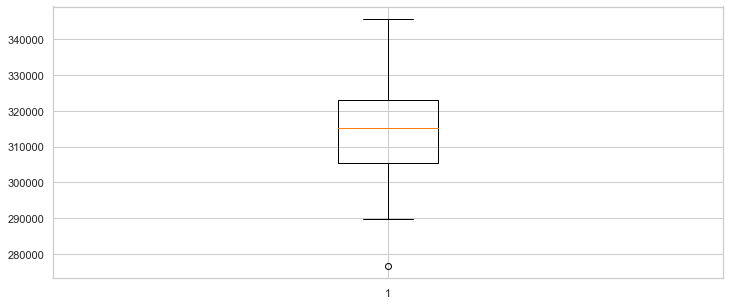

In [370]:
plt.boxplot(results)
plt.show()

# Conclusion: Lineal Regression looks to be the best model, but this model has several parametrs. Lets find the best parameters

This part isn't include in the analysis and final prediction. It is just to compare and find the best parameters.

In [4520]:
housing_prepared.shape

(2760, 662)

In [4523]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

# step-2: specify range of hyperparameters to tune
param_grid = [{'n_features_to_select': list(range(50,670,75))}]

lineal_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
rfe = RFE(lineal_reg) 

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(rfe, param_grid, cv=5,
                           scoring='neg_root_mean_squared_error',
                           verbose = 3,
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END n_features_to_select=50;, score=(train=-501102.509, test=-573866.065) total time=  36.0s
[CV 2/5] END n_features_to_select=50;, score=(train=-517606.733, test=-525348.166) total time=  34.6s
[CV 3/5] END n_features_to_select=50;, score=(train=-528011.672, test=-513489.657) total time=  30.2s
[CV 4/5] END n_features_to_select=50;, score=(train=-480606.175, test=-598822.952) total time=  34.2s
[CV 5/5] END n_features_to_select=50;, score=(train=-522642.582, test=-547840.362) total time=  34.1s
[CV 1/5] END n_features_to_select=125;, score=(train=-362721.884, test=-386343.886) total time=  35.7s
[CV 2/5] END n_features_to_select=125;, score=(train=-372399.733, test=-411645.393) total time=  34.0s
[CV 3/5] END n_features_to_select=125;, score=(train=-377998.596, test=-403660.696) total time=  30.4s
[CV 4/5] END n_features_to_select=125;, score=(train=-343818.772, test=-450068.451) total time=  34.6s
[CV 5/5] END n_fea

GridSearchCV(cv=5, estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [50, 125, 200, 275, 350, 425,
                                                   500, 575, 650]}],
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [4524]:
print("the best parameters are:")
print(grid_search.best_params_)

the best parameters are:
{'n_features_to_select': 650}


In [4525]:
print("Best Score")
np.sqrt(-grid_search.best_score_)

Best Score


599.415606914293

In [4526]:
print("the best trained model:")
grid_search.best_estimator_

the best trained model:


RFE(estimator=LinearRegression(), n_features_to_select=650)

In [4527]:
results = grid_search.cv_results_

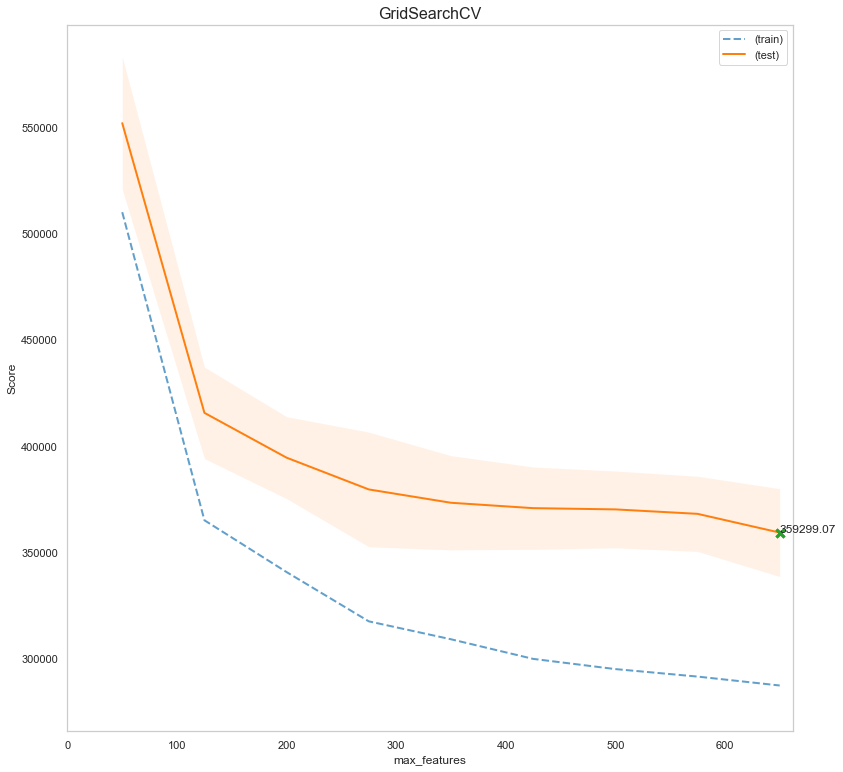

In [4529]:
#plot the results
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV",
          fontsize=16)

plt.xlabel("max_features")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 662)


# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_n_features_to_select'].data, dtype=float)


for sample, style in (('train', '--'), ('test', '-')):
    sample_score_mean = (-results['mean_%s_score' % (sample)])
    sample_score_std = (results['std_%s_score' % (sample)])
    ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                    sample_score_mean + sample_score_std,
                    alpha=0.1 if sample == 'test' else 0)
    ax.plot(X_axis, sample_score_mean, style,
            alpha=1 if sample == 'test' else 0.7,
            label="(%s)" % ( sample))

best_index = np.nonzero(results['rank_test_score' ] == 1)[0][0]
best_score =  (-results['mean_test_score' ][best_index])

# Plot a dotted vertical line at the best score for that scorer marked by x
ax.plot([X_axis[best_index], ] * 2, [best_score, best_score],
        linestyle='-.',  marker='x', markeredgewidth=3, ms=8)

# Annotate the best score for that scorer
ax.annotate("%0.2f" % best_score,
            (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

In [4530]:
## Best features according to Random Forest
feature_importances = grid_search.best_estimator_.support_  #.ranking_
feature_importances

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [4531]:
extra_attribs = ["rooms_per_building_area", "bedrooms_per_room","bathrooms_per_room", "carspot_per_area", "building_per_landsize"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(full_pipeline.named_transformers_["cat"]['one_hot_encoder'].categories_[0])

attributes = ["log_" + t for t in num_attribs0 ] + num_attribs1 + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True) #False: bathrooms_per_room, Propertycount, Postcode, Car, Lattitude, BedRoomsCat

[(True, 'rooms_per_building_area'),
 (True, 'log_Landsize'),
 (True, 'log_BuildingArea'),
 (True, 'carspot_per_area'),
 (True, 'building_per_landsize'),
 (True, 'bedrooms_per_room'),
 (True, 'bathrooms_per_room'),
 (True, 'YearMonth'),
 (True, 'YearBuilt'),
 (True, 'Year'),
 (True, 'Yarra Ranges'),
 (True, 'Yarra'),
 (True, 'Wyndham'),
 (True, 'Whittlesea'),
 (True, 'Whitehorse'),
 (True, 'Unknown'),
 (True, 'Stonnington'),
 (True, 'RoomsCat'),
 (True, 'Rooms'),
 (True, 'Port Phillip'),
 (True, 'Nillumbik'),
 (True, 'Moreland'),
 (True, 'Moonee Valley'),
 (True, 'Month'),
 (True, 'Monash'),
 (True, 'Melton'),
 (True, 'Melbourne'),
 (True, 'Maroondah'),
 (True, 'Maribyrnong'),
 (True, 'Manningham'),
 (True, 'Macedon Ranges'),
 (True, 'Longtitude'),
 (True, 'Lattitude'),
 (True, 'Landsize'),
 (True, 'Knox'),
 (True, 'Kingston'),
 (True, 'Hume'),
 (True, 'HouseYears'),
 (True, 'Hobsons Bay'),
 (True, 'Greater Dandenong'),
 (True, 'Glen Eira'),
 (True, 'Frankston'),
 (True, 'Distance'),
 (

 ## Final Model 
 Create Final Model and evaluate it (You shoud do this only once)

In [852]:
X_test = data_set.loc[data_set.set=="test"]
len(X_test)

8148

In [853]:
#final_model = grid_search.best_estimator_

## predict the test set and generate the submission file
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = lin_reg.predict(X_test_prepared) #final_model
df_output = pd.DataFrame(final_predictions)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('final_prices.csv',index=False)

In [472]:
negative_number = [ number for number in final_predictions if number<0]
print(len(negative_number))

31


# Conclusion

In other tests, the knn has given pretty mediocre results, so we stick with the linear model. At the end of the day, for many categories, such as rooms, car spots or buildingarea, the price depends linearly with the value of the parameter-> The bigger the house, the pricier it gets